<div class="alert alert-block alert-info">
    
***Male and female students' heights were measured and recorded in a file named 'Gender Heights.csv' (attached). The mining engineering students' society (SMES) wants to understand whether there is a significant difference between the average heights of female and male students in order to assist in the decision to merge the society's male and female basketball teams. Use an approriate statistical test to check if there is a significant difference between male and female students' heights and advise the society accordingly. The data has already been cleaned.***

# ***1. Import Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

# ***2. Import Data***

In [2]:
gender_heights = pd.read_csv('C:\\Users\\a0008578\\Desktop\\Jupyter Notebooks\\Gender Heights.csv') #Import data

# ***3. Exploratory Data Analysis***

## ***3.1. Explore shape of data frame***

In [3]:
print(gender_heights)

      Gender  Height
0       Male    73.8
1       Male    68.8
2       Male    74.1
3       Male    71.7
4       Male    69.9
...      ...     ...
9995  Female    66.2
9996  Female    67.1
9997  Female    63.9
9998  Female    69.0
9999  Female    61.9

[10000 rows x 2 columns]


In [4]:
gender_heights.info() #Displays number of columns, non values in each column and type of variables in each column
gender_heights.shape #Reports the maximum number of observations and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


(10000, 2)

## ***3.2. Numeric summaries***

In [5]:
gender_heights.groupby('Gender').describe() #Calculates summmary statistics for Female and Male Heights

Height                                                  
         count      mean       std   min   25%   50%   75%   max
Gender                                                          
Female  5000.0  63.70844  2.696466  54.3  61.9  63.7  65.6  73.4
Male    5000.0  69.02720  2.863762  58.4  67.2  69.0  71.0  79.0

In [6]:
gender_heights.groupby('Gender').agg(pd.Series.mode) #Calculates summmary statistics for Female and Male Heights

,Height
Gender,
Female,63.9
Male,69.6


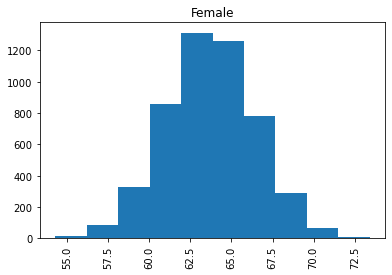

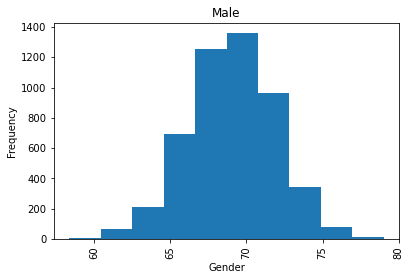

In [7]:
gender_heights.groupby('Gender').hist(by=gender_heights['Gender'])      #Plots histogram for Female and Male Heights
plt.xlabel('Gender')                                                    #Labels x-axis
plt.ylabel('Frequency');                                                #Labels y-axis

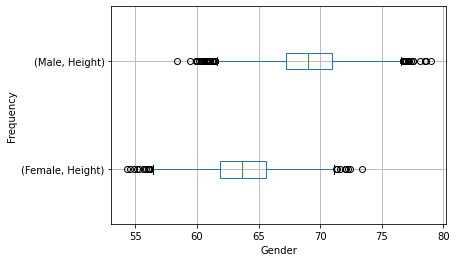

In [8]:
gender_heights.groupby('Gender').boxplot('Height', vert=False) #Plots histogram for Female and Male Heights
plt.xlabel('Gender')                                           #Labels x-axis
plt.ylabel('Frequency');                                       #Labels y-axis

# ***5. Normality Checks***

## ***5.1. Compare Mean, Mode and Median***

<div class="alert alert-block alert-info">

|Gender | Mean | Median |Mode|Comment|
| --- | --- | --- |--- |--- |
| Male |170.0 | 170.0 |170.6|mean≈median≈mode, normal|
| Female |164.7 |164.7 |164.9|mean≈median≈mode, normal|

    
 ***Overall, the both male and female heights seem to be sampled from a normal distribution***

## ***5.2. Analyse Histograms and Boxplots***

<div class="alert alert-block alert-info">
    
***"Female" and "Male" Heights - approximately symmetrical due the symmetrical shape of histogram***

***"Female" and "Male" Heights - approximately symmetrical due the median being near the middle of the plots***
 

## ***5.3. Normal Probability Plots***

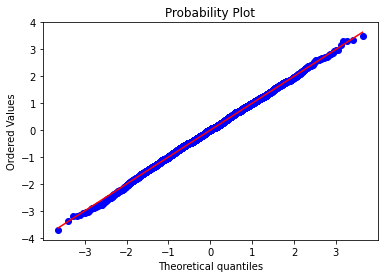

In [9]:
male_heights = list(gender_heights[gender_heights['Gender'] == 'Male']['Height']) #Creates ordered data for the specific group
n_male_heights = stats.zscore(male_heights)                                       #N-score transformation                                       
stats.probplot(n_male_heights, dist = 'norm', plot=pylab)                         #Calculates quantiles of sample data against those of a normal distribution                          
pylab.show()                                                                      #Displays the normal probability plot

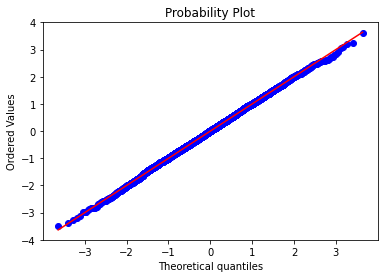

In [10]:
female_heights = list(gender_heights[gender_heights['Gender'] == 'Female']['Height']) #Creates ordered data for the specific group
n_female_heights = stats.zscore(female_heights)                                       #N-score transformation 
stats.probplot(n_female_heights, dist = 'norm', plot=pylab)                           #Calculates quantiles of sample data against those of a normal distribution  
pylab.show()                                                                          #Displays the normal probability plot

<div class="alert alert-block alert-info">
 
 ***Normal probability plots generally show data that is approximatly normally distributed with minor departures at tail ends which are probably due to outliers observed in the boxplots.***


## ***5.4. Calculate Skewness***

In [11]:
from scipy.stats import kurtosis
from scipy.stats import skew
skew(male_heights, bias=False) #Calculates skewness for "Male Heights"

-0.06141572200472763

<div class="alert alert-block alert-info">
 
 ***"Male Heights" - approximately symmetrical ( Skewness is between 0 & -0.5)***
 

In [12]:
skew(female_heights, bias=False) #Calculates skewness for "Female Heights"

-0.01889777680541078

<div class="alert alert-block alert-info">
 
 ***"Female Heights" - approximately symmetrical ( Skewness is between 0 & -0.5)***
 

## ***5.5. Normality Test: Anderson Darling Test***

In [13]:
from scipy.stats import anderson
anderson(male_heights, dist ='norm') #Runs Anderson Darling's normality test for Male Heights

AndersonResult(statistic=0.8364780706515376, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<div class="alert alert-block alert-info">

***Remember:***

***1. If (Test) Statistic > Critcal Value, Reject the null hypothesis (Note: Ho for A/D = data are normally distributed)***
    
***2. If (Test) Statistic < Critcal Value, Fail to reject the null hypothesis (Note: Ho for A/D = data are normally distributed)***

***For significance levels => 10%, (Test) Statistic < Critcal Values. Therefore, we fail to reject the null hypothesis that the data is normally distributed. (given a significance level of 10% or upwards)***
 
***For significance levels =< 5%, (Test) Statistic > Critcal Values. Therefore, we reject the null hypothesis that the data is normally distributed.***

In [14]:
anderson(female_heights, dist ='norm') #Runs Anderson Darling's normality test for Weight After 

AndersonResult(statistic=0.45239685367050697, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<div class="alert alert-block alert-info">

***Remember:***

***1. If (Test) Statistic > Critcal Value, Reject the null hypothesis (Note: Ho for A/D = data are normally distributed)***
    
***2. If (Test) Statistic < Critcal Value, Fail to reject the null hypothesis (Note: Ho for A/D = data are normally distributed)***

***For all significance levels, (Test) Statistic < Critcal Values. Therefore, we fail to reject the null hypothesis that the data is normally distributed.***

# ***6. Equal Variance Test***

<div class="alert alert-block alert-info">
    
***Since there is no  sufficient evidence to support that "Male Heights" is normally distributed at significance level of 5% or less. The equal variance test to use is the Levene Test which is robust for non-normal data.***

In [15]:
stats.levene(male_heights, female_heights) #Runs a Levene's Test for Equal Variances

LeveneResult(statistic=12.345654525890422, pvalue=0.000443967815388965)

<div class="alert alert-block alert-info">

***Remember:***

***Levene's test: Ho: Variance 1 = Variance 2***
    
***P-value <0.05, Reject the null hypothesisx***
               
***P-value >0.05, Fail to reject the null hypothesis***

***Here, p-value < 0.05, therefore we reject the null hypothesis that the variances of "Male Heights" are equal to "Female Heights".***

# ***7. Independent Two Samples T-Test***

In [16]:
stats.ttest_ind(male_heights, female_heights, equal_var=False) #Runs an independent two samples t test

Ttest_indResult(statistic=95.61395411409542, pvalue=0.0)

<div class="alert alert-block alert-info">
    
***By specifying that equal_var=False the test is run by adjusting the degrees of freedom to correct for the effect of unequal variances.***

***Independent Two Samples T-Test: Ho: Mean 1 = Mean 2***
    
***P-value <0.05, Reject the null hypothesis***
               
***P-value >0.05, Fail to reject the null hypothesis***

***Here, p-value < 0.05, therefore we reject the null hypothesis that the means of "Male Heights" are equal to "Female Heights".***

***Therefore, by making one team of males and females that might give the males a height advantage***